# 10.2 Get issued personal API key from NAVER

In [ ]:
client_id <- 'Ln0w*********'
client_secret <- 'r0******'

- save the API key as rdata

In [1]:
save(client_id, client_secret, file='C://Users/Dojun Park/Desktop/R/openapi.rdata')

ERROR: Error in save(client_id, client_secret, file = "C://Users/Dojun Park/Desktop/R/openapi.rdata"): objects 'client_id', 'client_secret' not found


- load the API key from rdata

In [2]:
rm(list=ls())

In [3]:
load('C://Users/Dojun Park/Desktop/R/openapi.rdata')

# 10.4 search news with the keyword "인공지능"

- install packages required

In [4]:
install.packages('RCurl')
install.packages('XML')
install.packages('wordcloud')
install.packages('RmecabKo')

package 'RCurl' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'RCurl'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"C:\Users\Dojun Park\AppData\Local\Continuum\anaconda3\Lib\R\library\00LOCK\RCurl\libs\x64\RCurl.dll를 C:\Users\Dojun Park\AppData\Local\Continuum\anaconda3\Lib\R\library\RCurl\libs\x64\RCurl.dll로 복사하는데 문제가 발생했습니다: Permission denied"Warning message:
"restored 'RCurl'"


The downloaded binary packages are in
	C:\Users\Dojun Park\AppData\Local\Temp\RtmpqieJpw\downloaded_packages
package 'XML' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'XML'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"C:\Users\Dojun Park\AppData\Local\Continuum\anaconda3\Lib\R\library\00LOCK\XML\libs\x64\XML.dll를 C:\Users\Dojun Park\AppData\Local\Continuum\anaconda3\Lib\R\library\XML\libs\x64\XML.dll로 복사하는데 문제가 발생했습니다: Permission denied"Warning message:
"restored 'XML'"


The downloaded binary packages are in
	C:\Users\Dojun Park\AppData\Local\Temp\RtmpqieJpw\downloaded_packages
package 'wordcloud' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'wordcloud'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"C:\Users\Dojun Park\AppData\Local\Continuum\anaconda3\Lib\R\library\00LOCK\wordcloud\libs\x64\wordcloud.dll를 C:\Users\Dojun Park\AppData\Local\Continuum\anaconda3\Lib\R\library\wordcloud\libs\x64\wordcloud.dll로 복사하는데 문제가 발생했습니다: Permission denied"Warning message:
"restored 'wordcloud'"


The downloaded binary packages are in
	C:\Users\Dojun Park\AppData\Local\Temp\RtmpqieJpw\downloaded_packages
package 'RmecabKo' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'RmecabKo'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"C:\Users\Dojun Park\AppData\Local\Continuum\anaconda3\Lib\R\library\00LOCK\RmecabKo\libs\x64\RmecabKo.dll를 C:\Users\Dojun Park\AppData\Local\Continuum\anaconda3\Lib\R\library\RmecabKo\libs\x64\RmecabKo.dll로 복사하는데 문제가 발생했습니다: Permission denied"Warning message:
"restored 'RmecabKo'"


The downloaded binary packages are in
	C:\Users\Dojun Park\AppData\Local\Temp\RtmpqieJpw\downloaded_packages


- import packages

In [5]:
library(RCurl)
library(XML)
library(wordcloud)
library(RmecabKo)
# install_mecab('c:/Rlibs/mecab')
# library(RmecabKo)

Warning message:
"package 'RCurl' was built under R version 3.6.3"Warning message:
"package 'XML' was built under R version 3.6.3"Warning message:
"package 'wordcloud' was built under R version 3.6.3"Loading required package: RColorBrewer
Warning message:
"package 'RmecabKo' was built under R version 3.6.3"

- get news as xml

In [6]:
search_url <- 'https://openapi.naver.com/v1/search/news.xml'
query <- URLencode(iconv('인공지능', 'euc-kr', 'UTF-8'))
url <- paste(search_url, '?query=', query, '&display=20', sep='')

In [7]:
iconv('인공지능', 'euc-kr', 'UTF-8')

[1] "인공지능"

In [8]:
URLencode(iconv('인공지능', 'euc-kr', 'UTF-8'))

[1] "%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5"

In [9]:
url

[1] "https://openapi.naver.com/v1/search/news.xml?query=%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5&display=20"

In [10]:
doc <- getURL(url,
             httpheader = c('Content-Type' = 'application/xml',
                           'X-Naver-Client-Id' = client_id,
                           'X-Naver-Client-Secret' = client_secret))

In [11]:
doc

[1] "<?xml version=\"1.0\" encoding=\"UTF-8\"?><rss version=\"2.0\"><channel><title>Naver Open API - news ::'인공지능'</title><link>https://search.naver.com</link><description>Naver Search Result</description><lastBuildDate>Mon, 30 Nov 2020 12:16:43 +0900</lastBuildDate><total>1006978</total><start>1</start><display>20</display><item><title>프로판가스 판매·구매도 ‘&lt;b&gt;인공지능&lt;/b&gt; 앱’으로…SK가스, 새 플랫폼 ‘위고’ ...</title><originallink>http://news.khan.co.kr/kh_news/khan_art_view.html?artid=202011301210001&amp;code=920501</originallink><link>https://news.naver.com/main/read.nhn?mode=LSD&amp;mid=sec&amp;sid1=101&amp;oid=032&amp;aid=0003045969</link><description>SK가스가 &lt;b&gt;인공지능&lt;/b&gt;(AI)을 기반으로 한 프로판 가스 유통 플랫폼 ‘위고(wogo)’를 개발해 다음달 1일부터 운영한다. 30일 SK가스에 따르면 이 플랫폼은 AI를 기반으로 프로판 충전사업자들에게 고객들의 프로판 수요 정보를... </description><pubDate>Mon, 30 Nov 2020 12:10:00 +0900</pubDate></item><item><title>이노비즈협회, 카이스트와 中企 AI 기반 제조 데이터 활용 지원 나선다</title><originallink>https://www.asiatoday.co.kr/view.php?key=20201130010019042</originallink><link>https://www.asiatoday.co.kr/view.php?key=20201130010019042</link><description>데이터 인프라 구축 사업은 &lt;b&gt;인공지능&lt;/b&gt;(AI) 중소벤처 제조 플랫폼(KAMP)의 내역사업으로 &lt;b&gt;인공지능&lt;/b&gt; 기반의 제조 데이터 활용 지원을 통해 국내 중소 제조기업의 경쟁력을 높이기 위한 정책이다. 이 사업은... </description><pubDate>Mon, 30 Nov 2020 12:10:00 +0900</pubDate></item><item><title>아스트라 임상시험에 디지털 센서 채용</title><originallink>http://www.bosa.co.kr/news/articleView.html?idxno=2138967</originallink><link>http://www.bosa.co.kr/news/articleView.html?idxno=2138967</link><description>임페디메드는 450만달러를 받고 세계 31개국에 총 375대의 소조를 임대해주기로 합의했다. 이밖에도 아스트라는 임상시험에서 &lt;b&gt;인공지능&lt;/b&gt;으로 심장잡음과 심방세동을 잡아내기 위해 에코의 디지털 청진기도 도입한 바 있다.</description><pubDate>Mon, 30 Nov 2020 12:08:00 +0900</pubDate></item><item><title>DX플랫폼 선보인 KT… B2B시장 1위 목표 주춧돌될까</title><originallink>http://www.sisaweek.com/news/articleView.html?idxno=139656</originallink><link>http://www.sisaweek.com/news/articleView.html?idxno=139656</link><description>KT DX 플랫폼은 기업이 디지털 혁신에 필요한 &lt;b&gt;인공지능&lt;/b&gt;(AI), 빅데이터, IoT, DevOps(개발환경) 등 다양한 플랫폼을 클라우드로 제공하는 패키지 서비스로 △AI 스튜디오 △데이터레이크 △IoT메이커스 △컨테이너... </description><pubDate>Mon, 30 Nov 2020 12:07:00 +0900</pubDate></item><item><title>SKT, 국내 첫 기초지자체 사회성과보상사업 참여-부여군 &apos;치매 안심구역&apos; 조성</title><originallink>http://www.techholic.co.kr/news/articleView.html?idxno=195083</originallink><link>http://www.techholic.co.kr/news/articleView.html?idxno=195083</link><description>참여사들은 &lt;b&gt;인공지능&lt;/b&gt;돌봄 등 최신 ICT 활용 전문 인지훈련 프로그램 &apos;메타기억교실&apos; 등 다양한 치매 예방 관련 프로그램을 운영할 방침이다. 이번 사업에서 SKT는 &lt;b&gt;인공지능&lt;/b&gt; 스피커 누구(NUGU) 등 최신 ICT 서비스를... </description><pubDate>Mon, 30 Nov 2020 12:07:00 +0900</pubDate></item><item><title>과기정통부, ‘실리콘밸리 투자 수출 한마당’ 비대면 개최</title><originallink>https://www.etoday.co.kr/news/view/1968193</originallink><link>https://www.etoday.co.kr/news/view/1968193</link><description>올해는 코로나19의 확산으로 야기된 글로벌 산업 변화의 중심에 있는 &lt;b&gt;인공지능&lt;/b&gt;(AI) 산업을 주제로 정보통신기술(ICT) 이노베이션 포럼, 온라인 전시 및 수출상담회, 국내ㆍ외 창업기업의 피칭대회, &lt;b&gt;인공지능&lt;/b&gt; Q&amp;amp;A... </description><pubDate>Mon, 30 Nov 2020 12:05:00 +0900</pubDate></item><item><title>과기정통부, 디지털 뉴딜 실현 ICT 국제표준화 지침서 마련</title><originallink>https://www.etoday.co.kr/news/view/1968160</originallink><link>https://www.etoday.co.kr/news/view/1968160</link><description>이번 표준화 전략맵은 올해 7월 발표한 국가전략인 ‘디지털 뉴딜 정책’과 연계를 강화하고 정합성을 높이기 위해 △데이터ㆍ네트워크ㆍ&lt;b&gt;인공지능&lt;/b&gt;(DNA) 생태계 강화 △비대면산업육성ㆍ교육 디지털 전환... </description><pubDate>Mon, 30 Nov 2020 12:05:00 +0900</pubDate></item><item><title>모노랩스, 필즈-독수리약국과 건강기능식품 구독시대 연다</title><originallink>https://www.techm.kr/news/articleView.html?idxno=77934</originallink><link>https://www.techm.kr/news/articleView.html?idxno=77934</link><description>/사진=모노랩스 제공 &lt;b&gt;인공지능&lt;/b&gt;(AI)기반 개인 맞춤형 건강기능식품 구독 서비스 스타트업 모노랩스는 30일 필즈, 독수리약국과 &apos;맞춤형 건강기능식품 판매 사업&apos;을 위한 업무협약을 체결했다고 밝혔다. 이번 협약을 통해... </description><pubDate>Mon, 30 Nov 2020 12:04:00 +0900</pubDate></item><item><title>KB국민은행, 자영업자·중소기업 상생 위한 &apos;KB bridge&ap

- extract news text from xml

In [12]:
xmlFile <- xmlParse(doc)
df <- xmlToDataFrame(getNodeSet(xmlFile, '//item'))
str(df)

'data.frame':	20 obs. of  5 variables:
 $ title       : Factor w/ 20 levels "&quot;자영업 稅 문제, 무료상담 해드려요&quot; KB브릿지 전면개편",..: 20 17 16 2 5 7 8 12 4 15 ...
 $ originallink: Factor w/ 20 levels "http://news.khan.co.kr/kh_news/khan_art_view.html?artid=202011301210001&code=920501",..: 1 15 2 7 8 18 17 20 14 13 ...
 $ link        : Factor w/ 20 levels "http://www.bosa.co.kr/news/articleView.html?idxno=2138967",..: 8 16 1 4 5 19 18 20 15 14 ...
 $ description : Factor w/ 20 levels "/사진=모노랩스 제공 <b>인공지능</b>(AI)기반 개인 맞춤형 건강기능식품 구독 서비스 스타트업 모노랩스는 30일 필즈,"| __truncated__,..: 4 5 16 3 19 11 13 1 6 10 ...
 $ pubDate     : Factor w/ 9 levels "Mon, 30 Nov 2020 12:00:00 +0900",..: 9 9 8 7 7 6 6 5 5 4 ...


In [13]:
xmlParse(doc)

ERROR while rich displaying an object: Error in cat(as(x, "character"), "\n"): '<ec><9d><b8>怨듭<a7><eb>뒫'</title>
    <link>https://search.naver.com</link>
    <description>Naver Search Result</description>
    <lastBuildDate>Mon, 30 Nov 2020 12:16:43 +0900</lastBuildDate>
    <total>1006978</total>
    <start>1</start>
    <display>20</display>
    <item>
      <title><ed>봽濡쒗뙋媛<ec>뒪 <ed>뙋留ㅒ룰뎄留ㅻ룄 <e2><98>&lt;b&gt;<ec>씤怨듭<a7><eb>뒫&lt;/b&gt; <ec>빋<e2>숈쑝濡쒋쪺K媛<ec>뒪, <ec>깉 <ed>뵆<eb>옯<ed>뤌 <e2>섏쐞怨졻<99> ...</title>
      <originallink>http://news.khan.co.kr/kh_news/khan_art_view.html?artid=202011301210001&amp;code=920501</originallink>
      <link>https://news.naver.com/main/read.nhn?mode=LSD&amp;mid=sec&amp;sid1=101&amp;oid=032&amp;aid=0003045969</link>
      <description>SK媛<ec>뒪媛 &lt;b&gt;<ec>씤怨듭<a7><eb>뒫&lt;/b&gt;(AI)<ec>쓣 湲곕컲<ec>쑝濡<9c> <ed>븳 <ed>봽濡쒗뙋 媛<ec>뒪 <ec>쑀<ed>넻 <ed>뵆<eb>옯<ed>뤌 <e2>섏쐞怨<a0>(wogo)<e2>숇<a5><bc> 媛쒕컻<ed>빐 <eb>떎<ec>쓬<eb>떖 1<ec>씪遺<ed>꽣 <ec>슫<ec>쁺<ed>븳<eb>



In [14]:
xmlRoot(xmlParse(doc))

<rss version="2.0">
  <channel>
    <title>Naver Open API - news ::'인공지능'</title>
    <link>https://search.naver.com</link>
    <description>Naver Search Result</description>
    <lastBuildDate>Mon, 30 Nov 2020 12:16:43 +0900</lastBuildDate>
    <total>1006978</total>
    <start>1</start>
    <display>20</display>
    <item>
      <title>프로판가스 판매·구매도 ‘&lt;b&gt;인공지능&lt;/b&gt; 앱’으로…SK가스, 새 플랫폼 ‘위고’ ...</title>
      <originallink>http://news.khan.co.kr/kh_news/khan_art_view.html?artid=202011301210001&amp;code=920501</originallink>
      <link>https://news.naver.com/main/read.nhn?mode=LSD&amp;mid=sec&amp;sid1=101&amp;oid=032&amp;aid=0003045969</link>
      <description>SK가스가 &lt;b&gt;인공지능&lt;/b&gt;(AI)을 기반으로 한 프로판 가스 유통 플랫폼 ‘위고(wogo)’를 개발해 다음달 1일부터 운영한다. 30일 SK가스에 따르면 이 플랫폼은 AI를 기반으로 프로판 충전사업자들에게 고객들의 프로판 수요 정보를... </description>
      <pubDate>Mon, 30 Nov 2020 12:10:00 +0900</pubDate>
    </item>
    <item>
      <title>이노비즈협회, 카이스트와 中企 AI 기반 제조 데이터 활용 지원 나선다</title>
      <originallink>

In [15]:
getNodeSet(xmlParse(doc), '//item')

[[1]]
<item>
  <title>프로판가스 판매·구매도 ‘&lt;b&gt;인공지능&lt;/b&gt; 앱’으로…SK가스, 새 플랫폼 ‘위고’ ...</title>
  <originallink>http://news.khan.co.kr/kh_news/khan_art_view.html?artid=202011301210001&amp;code=920501</originallink>
  <link>https://news.naver.com/main/read.nhn?mode=LSD&amp;mid=sec&amp;sid1=101&amp;oid=032&amp;aid=0003045969</link>
  <description>SK가스가 &lt;b&gt;인공지능&lt;/b&gt;(AI)을 기반으로 한 프로판 가스 유통 플랫폼 ‘위고(wogo)’를 개발해 다음달 1일부터 운영한다. 30일 SK가스에 따르면 이 플랫폼은 AI를 기반으로 프로판 충전사업자들에게 고객들의 프로판 수요 정보를... </description>
  <pubDate>Mon, 30 Nov 2020 12:10:00 +0900</pubDate>
</item> 

[[2]]
<item>
  <title>이노비즈협회, 카이스트와 中企 AI 기반 제조 데이터 활용 지원 나선다</title>
  <originallink>https://www.asiatoday.co.kr/view.php?key=20201130010019042</originallink>
  <link>https://www.asiatoday.co.kr/view.php?key=20201130010019042</link>
  <description>데이터 인프라 구축 사업은 &lt;b&gt;인공지능&lt;/b&gt;(AI) 중소벤처 제조 플랫폼(KAMP)의 내역사업으로 &lt;b&gt;인공지능&lt;/b&gt; 기반의 제조 데이터 활용 지원을 통해 국내 중소 제조기업의 경쟁력을 높이기 위한 정책이다. 이 사업은... </description>
  <pubDate>

In [16]:
df <- xmlToDataFrame(getNodeSet(xmlParse(doc), '//item'))

In [17]:
description <- df[, 4]
print(description)

 [1] SK가스가 <b>인공지능</b>(AI)을 기반으로 한 프로판 가스 유통 플랫폼 ‘위고(wogo)’를 개발해 다음달 1일부터 운영한다. 30일 SK가스에 따르면 이 플랫폼은 AI를 기반으로 프로판 충전사업자들에게 고객들의 프로판 수요 정보를...         
 [2] 데이터 인프라 구축 사업은 <b>인공지능</b>(AI) 중소벤처 제조 플랫폼(KAMP)의 내역사업으로 <b>인공지능</b> 기반의 제조 데이터 활용 지원을 통해 국내 중소 제조기업의 경쟁력을 높이기 위한 정책이다. 이 사업은...                      
 [3] 임페디메드는 450만달러를 받고 세계 31개국에 총 375대의 소조를 임대해주기로 합의했다. 이밖에도 아스트라는 임상시험에서 <b>인공지능</b>으로 심장잡음과 심방세동을 잡아내기 위해 에코의 디지털 청진기도 도입한 바 있다.              
 [4] KT DX 플랫폼은 기업이 디지털 혁신에 필요한 <b>인공지능</b>(AI), 빅데이터, IoT, DevOps(개발환경) 등 다양한 플랫폼을 클라우드로 제공하는 패키지 서비스로 △AI 스튜디오 △데이터레이크 △IoT메이커스 △컨테이너...                   
 [5] 참여사들은 <b>인공지능</b>돌봄 등 최신 ICT 활용 전문 인지훈련 프로그램 '메타기억교실' 등 다양한 치매 예방 관련 프로그램을 운영할 방침이다. 이번 사업에서 SKT는 <b>인공지능</b> 스피커 누구(NUGU) 등 최신 ICT 서비스를...          
 [6] 올해는 코로나19의 확산으로 야기된 글로벌 산업 변화의 중심에 있는 <b>인공지능</b>(AI) 산업을 주제로 정보통신기술(ICT) 이노베이션 포럼, 온라인 전시 및 수출상담회, 국내ㆍ외 창업기업의 피칭대회, <b>인공지능</b> Q&amp;A...         
 [7] 이번 표준화 전략맵은 올해 7월 발표한 국가전략인 ‘디지털 뉴딜 정책’과 연계를 강화하고 정합성을 높이기 위해 △데이터ㆍ네트워크ㆍ<b>

- text preprocessing

In [18]:
description2 <- gsub('<b>|</b>|&quot;', '', description)
print(description2)

 [1] "SK가스가 인공지능(AI)을 기반으로 한 프로판 가스 유통 플랫폼 ‘위고(wogo)’를 개발해 다음달 1일부터 운영한다. 30일 SK가스에 따르면 이 플랫폼은 AI를 기반으로 프로판 충전사업자들에게 고객들의 프로판 수요 정보를... " 
 [2] "데이터 인프라 구축 사업은 인공지능(AI) 중소벤처 제조 플랫폼(KAMP)의 내역사업으로 인공지능 기반의 제조 데이터 활용 지원을 통해 국내 중소 제조기업의 경쟁력을 높이기 위한 정책이다. 이 사업은... "                     
 [3] "임페디메드는 450만달러를 받고 세계 31개국에 총 375대의 소조를 임대해주기로 합의했다. 이밖에도 아스트라는 임상시험에서 인공지능으로 심장잡음과 심방세동을 잡아내기 위해 에코의 디지털 청진기도 도입한 바 있다."       
 [4] "KT DX 플랫폼은 기업이 디지털 혁신에 필요한 인공지능(AI), 빅데이터, IoT, DevOps(개발환경) 등 다양한 플랫폼을 클라우드로 제공하는 패키지 서비스로 △AI 스튜디오 △데이터레이크 △IoT메이커스 △컨테이너... "           
 [5] "참여사들은 인공지능돌봄 등 최신 ICT 활용 전문 인지훈련 프로그램 '메타기억교실' 등 다양한 치매 예방 관련 프로그램을 운영할 방침이다. 이번 사업에서 SKT는 인공지능 스피커 누구(NUGU) 등 최신 ICT 서비스를... "         
 [6] "올해는 코로나19의 확산으로 야기된 글로벌 산업 변화의 중심에 있는 인공지능(AI) 산업을 주제로 정보통신기술(ICT) 이노베이션 포럼, 온라인 전시 및 수출상담회, 국내ㆍ외 창업기업의 피칭대회, 인공지능 Q&amp;A... "        
 [7] "이번 표준화 전략맵은 올해 7월 발표한 국가전략인 ‘디지털 뉴딜 정책’과 연계를 강화하고 정합성을 높이기 위해 △데이터ㆍ네트워크ㆍ인공지능(DNA) 생태계 강화 △비대면산업육성ㆍ교육 디지털 전환... "                    
 [8] "/사진=모노랩

- noun extraction

In [19]:
nouns <- nouns(iconv(description2, 'utf-8'))
print(nouns)

$`SK가스가 인공지능(AI)을 기반으로 한 프로판 가스 유통 플랫폼 ‘위고(wogo)’를 개발해 다음달 1일부터 운영한다. 30일 SK가스에 따르면 이 플랫폼은 AI를 기반으로 프로판 충전사업자들에게 고객들의 프로판 수요 정보를... `
 [1] "가스"     "인공지능" "기반"     "프로판"   "가스"     "유통"    
 [7] "플랫폼"   "위고"     "개발"     "다음"     "달"       "일"      
[13] "운영"     "일"       "가스"     "플랫폼"   "기반"     "프로판"  
[19] "충전"     "사업자"   "고객"     "프로판"   "수요"     "정보"    

$`데이터 인프라 구축 사업은 인공지능(AI) 중소벤처 제조 플랫폼(KAMP)의 내역사업으로 인공지능 기반의 제조 데이터 활용 지원을 통해 국내 중소 제조기업의 경쟁력을 높이기 위한 정책이다. 이 사업은... `
 [1] "데이터"   "인프라"   "구축"     "사업"     "인공지능" "중소"    
 [7] "벤처"     "제조"     "플랫폼"   "내역"     "사업"     "인공지능"
[13] "기반"     "제조"     "데이터"   "활용"     "지원"     "국내"    
[19] "중소"     "제조"     "기업"     "경쟁력"   "정책"     "사업"    

$`임페디메드는 450만달러를 받고 세계 31개국에 총 375대의 소조를 임대해주기로 합의했다. 이밖에도 아스트라는 임상시험에서 인공지능으로 심장잡음과 심방세동을 잡아내기 위해 에코의 디지털 청진기도 도입한 바 있다.`
 [1] "임"       "페디"     "메드"     "만"       "달러"     "세계"    
 [7] "개국"     "대"       "소조"     "임대"     "합의"     "밖"      
[13] "아스트"   "임상시험" "인공지능" "심장"     "잡음"  

In [20]:
str(nouns)

List of 20
 $ SK가스가 인공지능(AI)을 기반으로 한 프로판 가스 유통 플랫폼 ‘위고(wogo)’를 개발해 다음달 1일부터 운영한다. 30일 SK가스에 따르면 이 플랫폼은 AI를 기반으로 프로판 충전사업자들에게 고객들의 프로판 수요 정보를...  : chr [1:24] "가스" "인공지능" "기반" "프로판" ...
 $ 데이터 인프라 구축 사업은 인공지능(AI) 중소벤처 제조 플랫폼(KAMP)의 내역사업으로 인공지능 기반의 제조 데이터 활용 지원을 통해 국내 중소 제조기업의 경쟁력을 높이기 위한 정책이다. 이 사업은...                      : chr [1:24] "데이터" "인프라" "구축" "사업" ...
 $ 임페디메드는 450만달러를 받고 세계 31개국에 총 375대의 소조를 임대해주기로 합의했다. 이밖에도 아스트라는 임상시험에서 인공지능으로 심장잡음과 심방세동을 잡아내기 위해 에코의 디지털 청진기도 도입한 바 있다.       : chr [1:23] "임" "페디" "메드" "만" ...
 $ KT DX 플랫폼은 기업이 디지털 혁신에 필요한 인공지능(AI), 빅데이터, IoT, DevOps(개발환경) 등 다양한 플랫폼을 클라우드로 제공하는 패키지 서비스로 △AI 스튜디오 △데이터레이크 △IoT메이커스 △컨테이너...            : chr [1:22] "플랫폼" "기업" "디지털" "혁신" ...
 $ 참여사들은 인공지능돌봄 등 최신 ICT 활용 전문 인지훈련 프로그램 '메타기억교실' 등 다양한 치매 예방 관련 프로그램을 운영할 방침이다. 이번 사업에서 SKT는 인공지능 스피커 누구(NUGU) 등 최신 ICT 서비스를...          : chr [1:27] "여사" "인공지능" "등" "최신" ...
 $ 올해는 코로나19의 확산으로 야기된 글로벌 산업 변화의 중심에 있는 인공지능(AI) 산업을 주제로 정보통신기술(ICT) 이노베이션 포럼, 온라인 전시 및 수출상담회, 국내ㆍ외 창업기업의 피칭대회, 인공지능

- make vocab list

In [30]:
nouns.all <- unlist(nouns, use.name=F)
print(nouns.all)

  [1] "애플"           "유럽"           "인공지능"       "스타트업"      
  [5] "인수"           "인공지능"       "비서"           "서비스"        
  [9] "시리"           "강화"           "목적"           "해석"          
 [13] "일"             "블룸버그"       "애플"           "초"            
 [17] "스페인"         "바르셀로나"     "위치"           "빌링스"        
 [21] "인수"           "보도"           "인수"           "시장"          
 [25] "수요"           "정부"           "년"             "인공지능"      
 [29] "분야"           "핵심"           "만"             "명"            
 [33] "양성"           "발표"           "과기"           "정통부"        
 [37] "차"             "산업"           "혁명"           "지표"          
 [41] "보고서"         "데이터"         "직무"           "인력"          
 [45] "양성"           "증가"           "실정"           "이"            
 [49] "곳"             "로봇"           "레이저"         "인공지능"      
 [53] "프린팅"         "등"             "다양"           "분야"          
 [57] "연구"           "한국기계연구원" "박상진"         "원장"          
 [61] "제조"           "장비"     

In [31]:
str(nouns.all)

 chr [1:462] "애플" "유럽" "인공지능" "스타트업" "인수" "인공지능" "비서" ...


In [33]:
# 단어길이가 1인 리스트
nouns.all1 <- nouns.all[nchar(nouns.all) <= 1]

# 단어길이가 2 이상인 단어 리스트
nouns.all2 <- nouns.all[nchar(nouns.all) >= 2]

In [34]:
nouns.all1

[1] "일" "초" "년" "만" "명" "차" "이" "곳" "등" "등" "위" "등" "꿈" "차" "등"
[16] "위" "등" "꿈" "차" "내" "량" "등" "망" "뉴" "빅" "등" "일" "캅" "문" "차"
[31] "등" "대" "조" "원" "것" "차" "조" "억" "원" "것" "수" "때" "차" "등" "펜"
[46] "션" "등" "곳" "홈" "등" "개" "등" "차" "차" "조" "원" "등" "데" "조" "원"
[61] "말" "수" "차" "년" "등" "위" "등" "꿈" "차" "반" "일"

In [35]:
nouns.all2

[1] "애플"           "유럽"           "인공지능"       "스타트업"      
  [5] "인수"           "인공지능"       "비서"           "서비스"        
  [9] "시리"           "강화"           "목적"           "해석"          
 [13] "블룸버그"       "애플"           "스페인"         "바르셀로나"    
 [17] "위치"           "빌링스"         "인수"           "보도"          
 [21] "인수"           "시장"           "수요"           "정부"          
 [25] "인공지능"       "분야"           "핵심"           "양성"          
 [29] "발표"           "과기"           "정통부"         "산업"          
 [33] "혁명"           "지표"           "보고서"         "데이터"        
 [37] "직무"           "인력"           "양성"           "증가"          
 [41] "실정"           "로봇"           "레이저"         "인공지능"      
 [45] "프린팅"         "다양"           "분야"           "연구"          
 [49] "한국기계연구원" "박상진"         "원장"           "제조"          
 [53] "장비"           "분야"           "연구"           "역량"          
 [57] "한국기계연구원" "제조"           "경험"           "기업"          
 [61] "협력"           "국내"           "제조"           "장비"          
 [65] "우리"           "반도체"         "세계"           "국가"          
 [69] "기반"           "인공지능"       "반도체"         "시스템"        
 [73] "반도체"         "차세대"         "분야"           "종합"          
 [77] "반도체"         "강국"           "도약"           "실현"          
 [81] "미래"           "수출"           "동력"           "부상"          
 [85] "우리"           "반도체"         "세계"           "국가"          
 [89] "기반"           "인공지능"       "반도체"         "시스템"        
 [93] "반도체"         "차세대"         "분야"           "종합"          
 [97] "반도체"         "강국"           "도약"           "실현"          
[101] "미래"           "수출"           "동력"           "부상"          
[105] "라이브"         "케어"           "서비스"         "사물"          
[109] "인터넷"         "센서"           "내장"           "바이오"        
[113] "캡슐"           "축우"           "반추위"         "체온"          
[117] "활동"           "생체"           "데이터"         "실시간"        
[121] "측정"           "로라"           "활용"           "생체"          
[125] "데이터"         "전송"           "인공지능"       "기술"          
[129] "기반"           "데일리"         "연찬"           "기자"          
[133] "선제"           "준비"           "역량"           "상생"          
[137] "협력"           "바탕"           "대한민국"       "산업"          
[141] "패러다임"       "변화"           "디지털"         "혁신"          
[145] "이하"           "핵심"           "인공지능"       "데이터"        
[149] "클라우드"       "안랩"           "자사"           "직원"          
[153] "산업"           "제어"           "시스템"         "보안"          
[157] "위협"           "탐지"           "인공지능"       "경진"          
[161] "대회"           "대상"           "수상"           "안랩"          
[165] "자사"           "김효석"         "대리"           "스마트"        
[169] "플랫폼"         "보안"           "연구소"         "강성민"        
[173] "주임"           "연구원"         "대통령"         "시스템"        
[177] "반도체"         "미래"           "바이오"         "헬스"          
[181] "산업"           "투자"           "미래"           "산업"          
[185] "경쟁력"         "산업"           "혁명"           "핵심"          
[189] "기반"           "데이터"         "네트워크"       "인공지능"      
[193] "분야"           "투자"           "이용자"         "차량"          
[197] "호출"           "인공지능"       "활용"           "도착"          
[201] "차량"           "배차"           "서비스"         "드라이버"      
[205] "차량"           "호출"           "목적지"         "표시"          
[209] "때문"           "사실"           "승차"           "거부"          
[213] "가능"           "목적지"         "올해"           "사회"          
[217] "경제"           "평등"           "미국"           "중국"          
[221] "무역"           "갈등"           "보호"           "무역"          
[225] "주의"           "인공지능"       "기반"           "산업"          
[229] "혁명"           "변화"           "가운데"         "코로나"        
[233] "타격"           "발생"           "회장"           "포스트"        
[237] "코로나"         "시대"           "최종"           "선발"          
[241] "기업"           "메텔"           "인공지능"       "베개"          
[245] "순수"           "바람"           "두피"           "드라이어"      
[249] "엠제이"       

- make count list

In [37]:
nouns.freq <- table(nouns.all2)
nouns.freq

nouns.all2
          가능           가시         가운데           갈등           강국 
             1              1              1              1              3 
        강성민           강화           거부           건강         경쟁력 
             1              1              1              1              2 
          경제           경진           경험           고객           공격 
             1              1              1              1              1 
          과기         관계자           관련         교육용           국가 
             1              1              1              1              3 
          국내         국산화         국제간         글로벌           금융 
             1              1              1              1              3 
          기반           기술           기업           기자           기존 
             7              4              2              1              1 
        김효석           내장       네트워크           다양           단계 
             1              1              3              1              1 
      

In [42]:
nouns.df <- data.frame(nouns.freq, stringsAsFactors=F)
nouns.df

nouns.all2,Freq
가능,1
가시,1
가운데,1
갈등,1
강국,3
강성민,1
강화,1
거부,1
건강,1
경쟁력,2


In [43]:
dim(nouns.df)

[1] 236   2

In [44]:
str(nouns.df)

'data.frame':	236 obs. of  2 variables:
 $ nouns.all2: Factor w/ 236 levels "가능","가시",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Freq      : int  1 1 1 1 3 1 1 1 1 2 ...


- sorting

In [45]:
nouns.df.sort <- nouns.df[order(-nouns.df$Freq),]  # 내림차순 정렬
nouns.df.sort

,nouns.all2,Freq
153,인공지능,19
73,반도체,15
102,산업,11
87,분야,8
26,기반,7
123,시스템,7
43,데이터,6
66,미래,5
228,혁명,5
27,기술,4


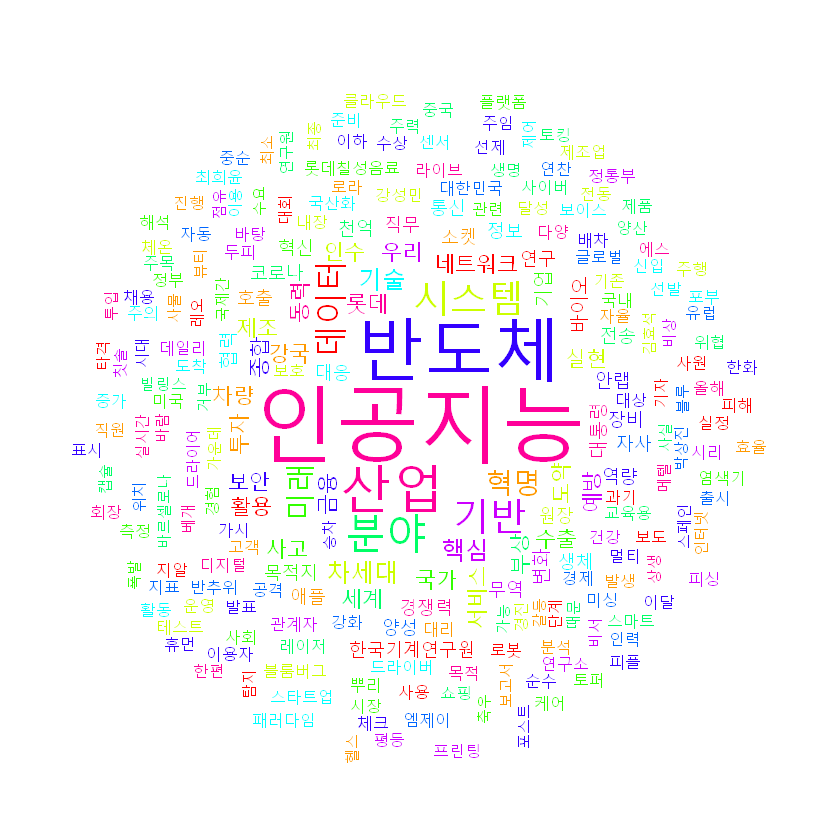

In [54]:
wordcloud(nouns.df.sort[,1],
         nouns.df.sort[,2],
         min.freq=1,
         scale=c(5, 0.7),
         rot.per=0.25,
         random.order=F,
         random.color=T,
         colors=rainbow(10))